Data Pre-processing

In [6]:
import pandas as pd

df = pd.read_csv('EEG_signals.csv')
print(df.head())          # Look at first few rows
print(df.dtypes)          # See types of each column
print(df.columns)         # Get column names


   Paciente  Situacao Classificacao    Media1    Media2  Mediana1  Mediana2  \
0         2         4        Normal  0.001816  0.000650 -0.003845 -0.001377   
1         2         4        Normal -0.000467 -0.000072 -0.012264 -0.001897   
2         2         4        Normal  0.006427  0.002034  0.006996  0.002214   
3         2         4        Normal  0.001152  0.000463  0.007148  0.002871   
4         2         4        Normal -0.002898 -0.001125 -0.007535 -0.002925   

    Desvio1   Desvio2  Variancia1  Variancia2  Energia1  Energia2  \
0  0.065430  0.023436    0.004281    0.000549  0.004251  0.000545   
1  0.087818  0.013580    0.007712    0.000184  0.007652  0.000183   
2  0.046933  0.014854    0.002203    0.000221  0.002227  0.000223   
3  0.096677  0.038837    0.009346    0.001508  0.009275  0.001497   
4  0.110445  0.042866    0.012198    0.001837  0.012111  0.001824   

   Envoltorio1  Envoltorio2         PSDt1         PSDt2         PSDb1  \
0     0.081346     0.029137  1.668057

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

def load_and_preprocess_data(file_path='EEG_signals.csv'):
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Features = all columns except the label
    X = df.drop(columns=['Classificacao'])

    # Encode label
    le = LabelEncoder()
    y = le.fit_transform(df['Classificacao'])  # e.g., 'Normal', 'Anxious', etc.

    # SMOTE for class balancing
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

Random Forest (RF)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = load_and_preprocess_data()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9646464646464646
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       792
           1       0.97      0.96      0.96       792

    accuracy                           0.96      1584
   macro avg       0.96      0.96      0.96      1584
weighted avg       0.96      0.96      0.96      1584

Confusion Matrix:
 [[771  21]
 [ 35 757]]


Multi-Layer Perceptron (MLP)

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       792
           1       0.96      0.95      0.95       792

    accuracy                           0.95      1584
   macro avg       0.95      0.95      0.95      1584
weighted avg       0.95      0.95      0.95      1584

Confusion Matrix:
 [[763  29]
 [ 43 749]]


Confusion Matrix

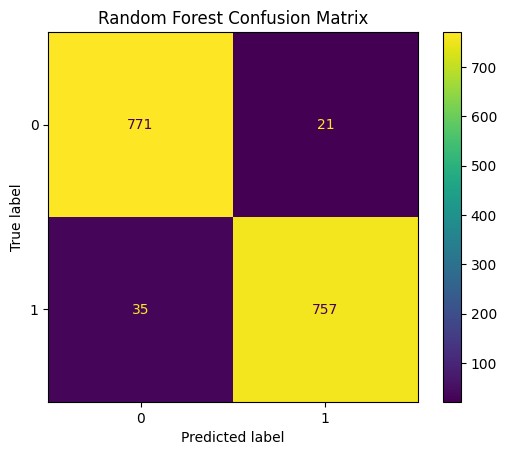

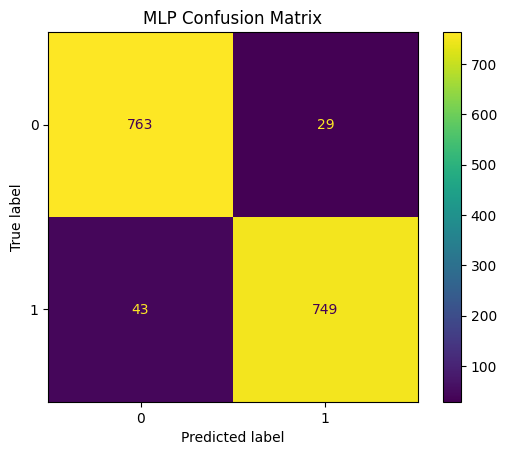

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix (RF)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion Matrix (MLP)
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.title("MLP Confusion Matrix")
plt.show()

Feature Importance for RF

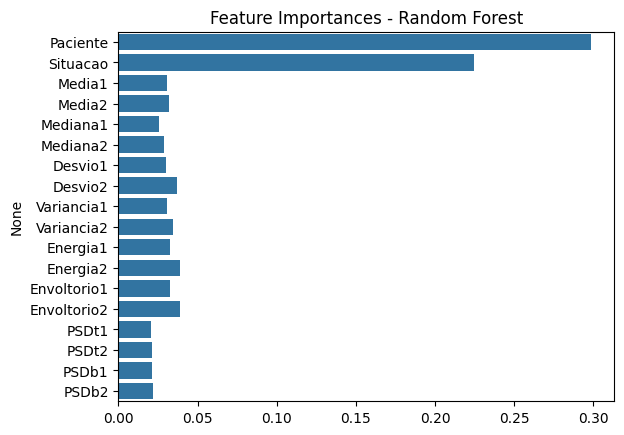

In [11]:
importances = rf.feature_importances_
features = df.drop(columns='Classificacao').columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.show()